# IMDB-Sentiment-Analysis

# 
Import libraries

In [2]:
pip install wordcloud 

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   --- ----------------------------------- 30.7/300.2 kB 660.6 kB/s eta 0:00:01
   --- ----------------------------------- 30.7/300.2 kB 660.6 kB/s eta 0:00:01
   ----- --------------------------------- 41.0/300.2 kB 217.9 kB/s eta 0:00:02
   ----- --------------------------------- 41.0/300.2 kB 217.9 kB/s eta 0:00:02
   ------- ------------------------------- 61.4/300.2 kB 233.8 kB/s eta 0:00:02
   ---------- ---------------------------- 81.9/300.2 kB 255.1 kB/s eta 0:00:01
   -------------- ----------------------- 112.6/300.2 kB 297.7 kB/s eta 0:00:01
   --------------- ---------------------- 122.9/300.2 kB 277.4 kB/s eta 0:00:01
   --

In [2]:
pip install spacy

  Obtaining dependency information for spacy from https://files.pythonhosted.org/packages/90/f0/0133b684e18932c7bf4075d94819746cee2c0329f2569db526b0fa1df1df/spacy-3.7.2-cp311-cp311-win_amd64.whl.metadata
  Using cached spacy_legacy-3.0.12-py2.py3-none-any.whl (29 kB)
  Obtaining dependency information for spacy-loggers<2.0.0,>=1.0.0 from https://files.pythonhosted.org/packages/33/78/d1a1a026ef3af911159398c939b1509d5c36fe524c7b644f34a5146c4e16/spacy_loggers-1.0.5-py3-none-any.whl.metadata
  Obtaining dependency information for murmurhash<1.1.0,>=0.28.0 from https://files.pythonhosted.org/packages/71/46/af01a20ec368bd9cb49a1d2df15e3eca113bbf6952cc1f2a47f1c6801a7f/murmurhash-1.0.10-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for cymem<2.1.0,>=2.0.2 from https://files.pythonhosted.org/packages/c1/c3/dd044e6f62a3d317c461f6f0c153c6573ed13025752d779e514000c15dd2/cymem-2.0.8-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for preshed<3.1.0,>=3.0.

In [4]:
pip install textblob

     ---------------------------------------- 0.0/636.8 kB ? eta -:--:--
      --------------------------------------- 10.2/636.8 kB ? eta -:--:--
      --------------------------------------- 10.2/636.8 kB ? eta -:--:--
      --------------------------------------- 10.2/636.8 kB ? eta -:--:--
     - ----------------------------------- 30.7/636.8 kB 119.1 kB/s eta 0:00:06
     - ----------------------------------- 30.7/636.8 kB 119.1 kB/s eta 0:00:06
     - ----------------------------------- 30.7/636.8 kB 119.1 kB/s eta 0:00:06
     -- ---------------------------------- 41.0/636.8 kB 103.4 kB/s eta 0:00:06
     -- ---------------------------------- 41.0/636.8 kB 103.4 kB/s eta 0:00:06
     --- --------------------------------- 61.4/636.8 kB 136.5 kB/s eta 0:00:05
     ---- -------------------------------- 71.7/636.8 kB 140.6 kB/s eta 0:00:05
     ----- ------------------------------- 92.2/636.8 kB 174.7 kB/s eta 0:00:04
     ------ ----------------------------- 122.9/636.8 kB 205.9 kB

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from textblob import TextBlob
from textblob import Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import os
print(os.listdir("C:"))
import warnings
warnings.filterwarnings('ignore')

['.idea', '.ipynb_checkpoints', 'archive.zip', 'Figure_1.png', 'IMDB Dataset.csv', 'imdbsentiment.py', 'imdb_dataset_sa.ipynb', 'negative reviews.png', 'venv']


# 
Import the training dataset

In [7]:
imdb_data=pd.read_csv('IMDB Dataset.csv')
print(imdb_data.shape)
imdb_data.head(10)

(50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


# 
Exploratery data analysis

In [8]:
imdb_data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


# 
Sentiment count

In [9]:
imdb_data['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

# 

Spliting the training dataset

In [10]:
train_reviews=imdb_data.review[:40000]
train_sentiments=imdb_data.sentiment[:40000]
test_reviews=imdb_data.review[40000:]
test_sentiments=imdb_data.sentiment[40000:]
print(train_reviews.shape,train_sentiments.shape)
print(test_reviews.shape,test_sentiments.shape)

(40000,) (40000,)
(10000,) (10000,)


# 
Plotting positive & negative bar graph

<Axes: xlabel='sentiment', ylabel='count'>

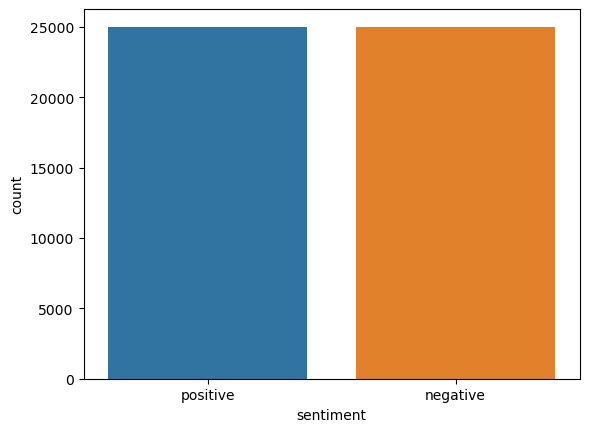

In [11]:
sns.countplot(x=imdb_data['sentiment'])

# 
Word cloud for positive & negative review words

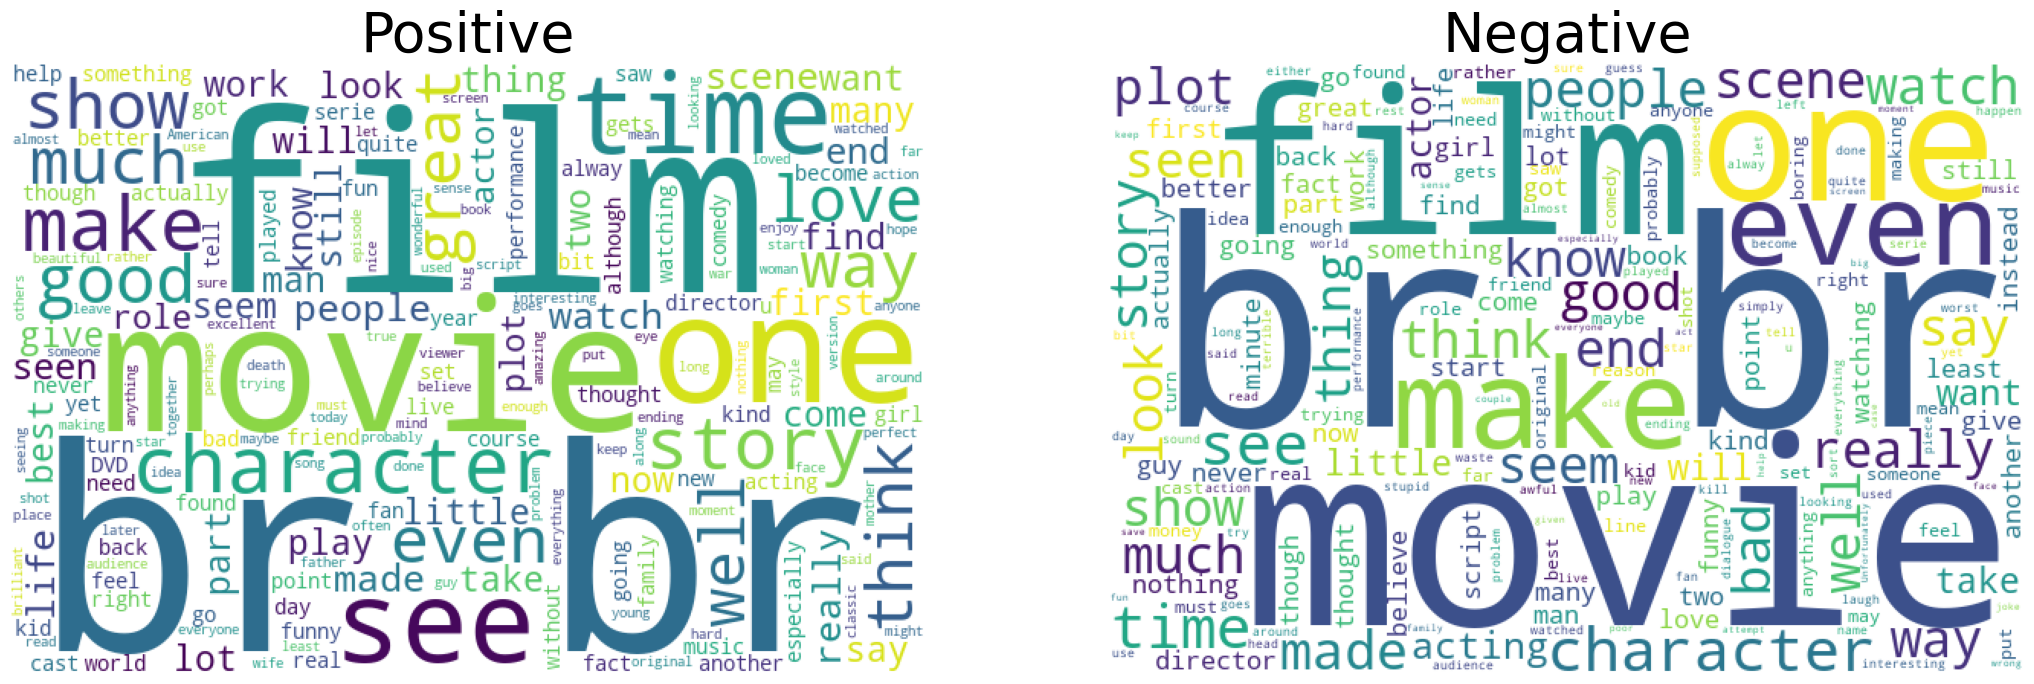

In [12]:
def makeWordCloud(bkColor, w, h, series, title, ax):
    wcl = WordCloud(background_color=bkColor,
                    width=w,
                    height=h).generate(" ".join(series))
    ax.imshow(wcl)
    ax.axis('off')
    ax.set_title(title, fontsize=40)
positive = imdb_data[imdb_data['sentiment']=="positive"]['review']
negative = imdb_data[imdb_data['sentiment']=="negative"]['review']
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[26, 8])
makeWordCloud("white", 600, 400, positive, "Positive", ax1)
makeWordCloud("white", 600, 400, negative, "Negative", ax2)
plt.show()

# 
Text normalization

In [13]:
tokenizer=ToktokTokenizer()
stopword_list=nltk.corpus.stopwords.words('english')

# 
Removing html strips and noise text

In [14]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text
imdb_data['review']=imdb_data['review'].apply(denoise_text)

# 
Removing special characters

In [15]:
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text
imdb_data['review']=imdb_data['review'].apply(remove_special_characters)

# 
Text stemming

In [16]:
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text
imdb_data['review']=imdb_data['review'].apply(simple_stemmer)

# 
Removing stopwords

In [12]:
stop=set(stopwords.words('english'))
print(stop)
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text
imdb_data['review']=imdb_data['review'].apply(remove_stopwords)

{'some', 'won', 'out', 'his', "aren't", 'other', 're', 'he', 'be', 'and', 'before', "mustn't", 'itself', 'its', "shan't", "doesn't", 'couldn', 'what', 'mightn', 'under', "couldn't", 'theirs', 'been', 'being', "you'd", 'through', 'ma', 'about', 'are', 'aren', "mightn't", 'me', 'in', 'where', 'further', 'all', 'most', 'will', 'but', "you'll", 'is', 'didn', 'from', "didn't", 'haven', 'down', 'doesn', 'such', 'hasn', 'how', 'do', 'these', 'ain', 'i', "needn't", 'my', 'they', "she's", 'should', 'did', 'who', "it's", 'have', 'again', 'does', "you've", 'below', "hasn't", 'too', 'against', 'so', 'weren', 'don', 'why', 'wouldn', 'both', 'of', 'when', 'm', 'yours', 'were', 'that', 'was', "weren't", "hadn't", 'while', 'during', 'once', 'on', 'it', 'their', 'll', 'then', 'by', 'there', 'your', 'needn', 'wasn', 'own', 'nor', 't', 'any', 'herself', "you're", 'each', 'very', "haven't", 'not', 'a', 'an', 'up', 'y', 'having', 'into', 'our', 'o', 'has', 'to', 've', 'shouldn', 'than', 'same', 'him', 'sha

# 
Normalized train reviews

In [13]:
norm_train_reviews=imdb_data.review[:40000]
norm_train_reviews[0]

'one review ha mention watch 1 oz episod youll hook right thi exactli happen meth first thing struck oz wa brutal unflinch scene violenc set right word go trust thi show faint heart timid thi show pull punch regard drug sex violenc hardcor classic use wordit call oz nicknam given oswald maximum secur state penitentari focus mainli emerald citi experiment section prison cell glass front face inward privaci high agenda em citi home manyaryan muslim gangsta latino christian italian irish moreso scuffl death stare dodgi deal shadi agreement never far awayi would say main appeal show due fact goe show wouldnt dare forget pretti pictur paint mainstream audienc forget charm forget romanceoz doesnt mess around first episod ever saw struck nasti wa surreal couldnt say wa readi watch develop tast oz got accustom high level graphic violenc violenc injustic crook guard wholl sold nickel inmat wholl kill order get away well manner middl class inmat turn prison bitch due lack street skill prison exp

# 
Normalized test reviews

In [14]:
norm_test_reviews=imdb_data.review[40000:]
norm_test_reviews[45005]

'read review watch thi piec cinemat garbag took least 2 page find somebodi els didnt think thi appallingli unfunni montag wasnt acm humour 70 inde ani era thi isnt least funni set sketch comedi ive ever seen itll till come along half skit alreadi done infinit better act monti python woodi allen wa say nice piec anim last 90 second highlight thi film would still get close sum mindless drivelridden thi wast 75 minut semin comedi onli world semin realli doe mean semen scatolog humour onli world scat actual fece precursor joke onli mean thi handbook comedi tit bum odd beaver niceif pubesc boy least one hand free havent found playboy exist give break becaus wa earli 70 way sketch comedi go back least ten year prior onli way could even forgiv thi film even made wa gunpoint retro hardli sketch clown subtli pervert children may cut edg circl could actual funni come realli quit sad kept go throughout entir 75 minut sheer belief may save genuin funni skit end gave film 1 becaus wa lower scoreand

# 
Bags of words model

In [15]:
cv=CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))
cv_train_reviews=cv.fit_transform(norm_train_reviews)
cv_test_reviews=cv.transform(norm_test_reviews)
print('BOW_cv_train:',cv_train_reviews.shape)
print('BOW_cv_test:',cv_test_reviews.shape)

BOW_cv_train: (40000, 6209089)
BOW_cv_test: (10000, 6209089)


# 
Term Frequency-Inverse Document Frequency model (TFIDF)

In [16]:
tv=TfidfVectorizer(min_df=0,max_df=1,use_idf=True,ngram_range=(1,3))
tv_train_reviews=tv.fit_transform(norm_train_reviews)
tv_test_reviews=tv.transform(norm_test_reviews)
print('Tfidf_train:',tv_train_reviews.shape)
print('Tfidf_test:',tv_test_reviews.shape)

Tfidf_train: (40000, 6209089)
Tfidf_test: (10000, 6209089)


# 
Labeling the sentiment text

In [17]:
lb=LabelBinarizer()
sentiment_data=lb.fit_transform(imdb_data['sentiment'])
print(sentiment_data.shape)

(50000, 1)


# 
Split the sentiment tdata

In [18]:
train_sentiments=sentiment_data[:40000]
test_sentiments=sentiment_data[40000:]
print(train_sentiments)
print(test_sentiments)

[[1]
 [1]
 [1]
 ...
 [1]
 [0]
 [0]]
[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


# 
Modelling the dataset

In [19]:
lr=LogisticRegression(penalty='l2',max_iter=500,C=1,random_state=42)
lr_bow=lr.fit(cv_train_reviews,train_sentiments)
print(lr_bow)
lr_tfidf=lr.fit(tv_train_reviews,train_sentiments)
print(lr_tfidf)

LogisticRegression(C=1, max_iter=500, random_state=42)
LogisticRegression(C=1, max_iter=500, random_state=42)


# 
Logistic regression model performane on test dataset

In [20]:
lr_bow_predict=lr.predict(cv_test_reviews)
print(lr_bow_predict)
lr_tfidf_predict=lr.predict(tv_test_reviews)
print(lr_tfidf_predict)

[0 0 0 ... 0 1 1]
[0 0 0 ... 0 1 1]


# 
Accuracy of the model

In [21]:
lr_bow_score=accuracy_score(test_sentiments,lr_bow_predict)
print("lr_bow_score :",lr_bow_score)
lr_tfidf_score=accuracy_score(test_sentiments,lr_tfidf_predict)
print("lr_tfidf_score :",lr_tfidf_score)

lr_bow_score : 0.7512
lr_tfidf_score : 0.75


# 
Print the classification report

In [22]:
lr_bow_report=classification_report(test_sentiments,lr_bow_predict,target_names=['Positive','Negative'])
print(lr_bow_report)
lr_tfidf_report=classification_report(test_sentiments,lr_tfidf_predict,target_names=['Positive','Negative'])
print(lr_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.75      0.75      0.75      4993
    Negative       0.75      0.75      0.75      5007

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000

              precision    recall  f1-score   support

    Positive       0.74      0.77      0.75      4993
    Negative       0.76      0.73      0.75      5007

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000



# 
Confusion matrix

In [23]:
cm_bow=confusion_matrix(test_sentiments,lr_bow_predict,labels=[1,0])
print(cm_bow)
cm_tfidf=confusion_matrix(test_sentiments,lr_tfidf_predict,labels=[1,0])
print(cm_tfidf)

[[3768 1239]
 [1249 3744]]
[[3663 1344]
 [1156 3837]]


# 
Stochastic gradient descent or Linear support vector machines for bag of words and tfidf features

In [24]:
svm=SGDClassifier(loss='hinge',max_iter=500,random_state=42)
svm_bow=svm.fit(cv_train_reviews,train_sentiments)
print(svm_bow)
svm_tfidf=svm.fit(tv_train_reviews,train_sentiments)
print(svm_tfidf)

SGDClassifier(max_iter=500, random_state=42)
SGDClassifier(max_iter=500, random_state=42)


# 
Model performance on test data

In [25]:
svm_bow_predict=svm.predict(cv_test_reviews)
print(svm_bow_predict)
svm_tfidf_predict=svm.predict(tv_test_reviews)
print(svm_tfidf_predict)

[1 1 0 ... 1 1 1]
[1 1 1 ... 1 1 1]


# 
Accuracy of the model

In [26]:
svm_bow_score=accuracy_score(test_sentiments,svm_bow_predict)
print("svm_bow_score :",svm_bow_score)
svm_tfidf_score=accuracy_score(test_sentiments,svm_tfidf_predict)
print("svm_tfidf_score :",svm_tfidf_score)

svm_bow_score : 0.5829
svm_tfidf_score : 0.5112


# 
Print the classification report

In [27]:
svm_bow_report=classification_report(test_sentiments,svm_bow_predict,target_names=['Positive','Negative'])
print(svm_bow_report)
svm_tfidf_report=classification_report(test_sentiments,svm_tfidf_predict,target_names=['Positive','Negative'])
print(svm_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.94      0.18      0.30      4993
    Negative       0.55      0.99      0.70      5007

    accuracy                           0.58     10000
   macro avg       0.74      0.58      0.50     10000
weighted avg       0.74      0.58      0.50     10000

              precision    recall  f1-score   support

    Positive       1.00      0.02      0.04      4993
    Negative       0.51      1.00      0.67      5007

    accuracy                           0.51     10000
   macro avg       0.75      0.51      0.36     10000
weighted avg       0.75      0.51      0.36     10000



# 
Plot the confusion matrix

In [28]:
cm_bow=confusion_matrix(test_sentiments,svm_bow_predict,labels=[1,0])
print(cm_bow)
cm_tfidf=confusion_matrix(test_sentiments,svm_tfidf_predict,labels=[1,0])
print(cm_tfidf)

[[4948   59]
 [4112  881]]
[[5007    0]
 [4888  105]]


# 
Multinomial Naive Bayes for bag of words and tfidf features

In [29]:
mnb=MultinomialNB()
mnb_bow=mnb.fit(cv_train_reviews,train_sentiments)
print(mnb_bow)
mnb_tfidf=mnb.fit(tv_train_reviews,train_sentiments)
print(mnb_tfidf)

MultinomialNB()
MultinomialNB()


# 
Model performance on test data

In [30]:
mnb_bow_predict=mnb.predict(cv_test_reviews)
print(mnb_bow_predict)
mnb_tfidf_predict=mnb.predict(tv_test_reviews)
print(mnb_tfidf_predict)

[0 0 0 ... 0 1 1]
[0 0 0 ... 0 1 1]


# 
Accuracy of the model

In [31]:
mnb_bow_score=accuracy_score(test_sentiments,mnb_bow_predict)
print("mnb_bow_score :",mnb_bow_score)
mnb_tfidf_score=accuracy_score(test_sentiments,mnb_tfidf_predict)
print("mnb_tfidf_score :",mnb_tfidf_score)

mnb_bow_score : 0.751
mnb_tfidf_score : 0.7509


# 
Print the classification report

In [32]:
mnb_bow_report=classification_report(test_sentiments,mnb_bow_predict,target_names=['Positive','Negative'])
print(mnb_bow_report)
mnb_tfidf_report=classification_report(test_sentiments,mnb_tfidf_predict,target_names=['Positive','Negative'])
print(mnb_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.75      0.76      0.75      4993
    Negative       0.75      0.75      0.75      5007

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000

              precision    recall  f1-score   support

    Positive       0.75      0.76      0.75      4993
    Negative       0.75      0.74      0.75      5007

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000



# 
Plot the confusion matrix

In [33]:
cm_bow=confusion_matrix(test_sentiments,mnb_bow_predict,labels=[1,0])
print(cm_bow)
cm_tfidf=confusion_matrix(test_sentiments,mnb_tfidf_predict,labels=[1,0])
print(cm_tfidf)

[[3736 1271]
 [1219 3774]]
[[3729 1278]
 [1213 3780]]


# 
Word cloud for positive review words

<function matplotlib.pyplot.show(close=None, block=None)>

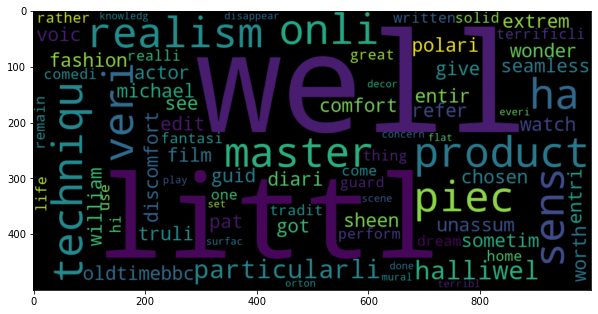

In [34]:
plt.figure(figsize=(10,10))
positive_text=norm_train_reviews[1]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
positive_words=WC.generate(positive_text)
plt.imshow(positive_words,interpolation='bilinear')
plt.show

# 
Word cloud for negative review words

<function matplotlib.pyplot.show(close=None, block=None)>

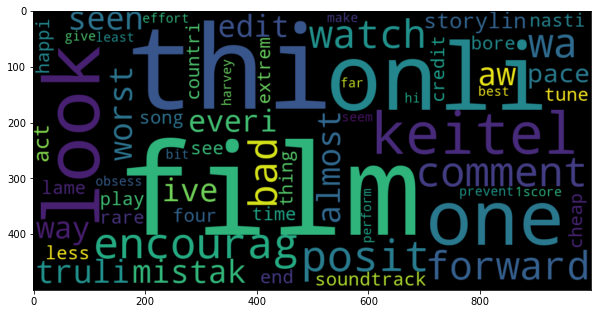

In [35]:
plt.figure(figsize=(10,10))
negative_text=norm_train_reviews[8]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
negative_words=WC.generate(negative_text)
plt.imshow(negative_words,interpolation='bilinear')
plt.show